# Respitory Mortality Estimation using Estimated Smoke Severity 
This file attempts use the Estimated Smoke Severity scores from `smoke_estimates_and_AQI/creating_smoke_estimate.ipynb` and historical respitory mortality to estimate respitory mortality in the Front Range of Colorado. Larimer County is located within the Front Range. 

In [19]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import re
import numpy as np
from io import StringIO

## Importing Estimated Smoke Severity

In [11]:
yearly_aqi = None 
with open('smoke_estimates_and_AQI/yearly_aqi_and_estimations.json') as f:
    yearly_aqi = json.load(f)
#yearly_aqi = {1963: {'estimated': 0.0023773497618277315, 'pm25': None, 'pm10': None, 'CO': None}, 1964: {'estimated': 0.0020043115695999613, 'pm25': None, 'pm10': None, 'CO': None}, 1965: {'estimated': 0.0009777136083809364, 'pm25': None, 'pm10': None, 'CO': None}, 1966: {'estimated': 0.003317580383719445, 'pm25': None, 'pm10': None, 'CO': None}, 1967: {'estimated': 0.0014363065206335502, 'pm25': None, 'pm10': None, 'CO': None}, 1968: {'estimated': 0.000896884522702971, 'pm25': None, 'pm10': None, 'CO': None}, 1969: {'estimated': 0.0010043379605474665, 'pm25': None, 'pm10': None, 'CO': None}, 1970: {'estimated': 0.0024946030845441306, 'pm25': None, 'pm10': None, 'CO': None}, 1971: {'estimated': 0.004332160373283769, 'pm25': None, 'pm10': None, 'CO': None}, 1972: {'estimated': 0.004078833632420163, 'pm25': None, 'pm10': None, 'CO': None}, 1973: {'estimated': 0.0024630663892897596, 'pm25': None, 'pm10': None, 'CO': None}, 1974: {'estimated': 0.0021163149167690094, 'pm25': None, 'pm10': None, 'CO': None}, 1975: {'estimated': 0.0018615007423819822, 'pm25': None, 'pm10': None, 'CO': 81.2}, 1976: {'estimated': 0.002547898052789835, 'pm25': None, 'pm10': None, 'CO': 24.27}, 1977: {'estimated': 0.002184987298155798, 'pm25': None, 'pm10': None, 'CO': None}, 1978: {'estimated': 0.0019311321276157818, 'pm25': None, 'pm10': None, 'CO': None}, 1979: {'estimated': 0.003141337722125578, 'pm25': None, 'pm10': None, 'CO': None}, 1980: {'estimated': 0.007149889136786897, 'pm25': None, 'pm10': None, 'CO': 30.2}, 1981: {'estimated': 0.006768566093351206, 'pm25': None, 'pm10': None, 'CO': 25.96}, 1982: {'estimated': 0.001972923206812418, 'pm25': None, 'pm10': None, 'CO': 21.88}, 1983: {'estimated': 0.004611516607021052, 'pm25': None, 'pm10': None, 'CO': 22.28}, 1984: {'estimated': 0.0061189137402432505, 'pm25': None, 'pm10': None, 'CO': 21.38}, 1985: {'estimated': 0.014650093598823499, 'pm25': None, 'pm10': None, 'CO': 24.79}, 1986: {'estimated': 0.009991828462830464, 'pm25': None, 'pm10': 28.23, 'CO': 22.12}, 1987: {'estimated': 0.010114304960668287, 'pm25': None, 'pm10': 26.54, 'CO': 20.66}, 1988: {'estimated': 0.04836015036432635, 'pm25': None, 'pm10': 23.79, 'CO': 22.32}, 1989: {'estimated': 0.026814695932562697, 'pm25': None, 'pm10': 28.25, 'CO': 21.32}, 1990: {'estimated': 0.0060119930681588754, 'pm25': None, 'pm10': 21.67, 'CO': 17.91}, 1991: {'estimated': 0.005612480500218705, 'pm25': None, 'pm10': 20.48, 'CO': 12.39}, 1992: {'estimated': 0.00715921058152661, 'pm25': None, 'pm10': 20.92, 'CO': 13.78}, 1993: {'estimated': 0.009082313127779436, 'pm25': None, 'pm10': 17.32, 'CO': 11.59}, 1994: {'estimated': 0.02178516157251937, 'pm25': None, 'pm10': 20.26, 'CO': 12.99}, 1995: {'estimated': 0.008608498622923129, 'pm25': None, 'pm10': 22.38, 'CO': 13.51}, 1996: {'estimated': 0.04149068663851035, 'pm25': None, 'pm10': 18.62, 'CO': 12.08}, 1997: {'estimated': 0.0031940711336313336, 'pm25': None, 'pm10': 14.06, 'CO': 12.64}, 1998: {'estimated': 0.0068422085447477484, 'pm25': None, 'pm10': 16.62, 'CO': 11.15}, 1999: {'estimated': 0.019576258377143975, 'pm25': 28.42, 'pm10': 17.61, 'CO': 10.8}, 2000: {'estimated': 0.24873158125860043, 'pm25': 32.33, 'pm10': 18.76, 'CO': 9.39}, 2001: {'estimated': 0.014545128286750024, 'pm25': 29.34, 'pm10': 19.22, 'CO': 4.49}, 2002: {'estimated': 0.09712233314273228, 'pm25': 29.63, 'pm10': 19.75, 'CO': 7.0}, 2003: {'estimated': 0.03451383314010588, 'pm25': 28.63, 'pm10': 18.3, 'CO': 8.28}, 2004: {'estimated': 0.042292201825698976, 'pm25': 25.02, 'pm10': 20.36, 'CO': 6.84}, 2005: {'estimated': 0.02391363298154056, 'pm25': 27.19, 'pm10': 20.89, 'CO': 7.37}, 2006: {'estimated': 0.05852000635210479, 'pm25': 27.73, 'pm10': 18.98, 'CO': 7.22}, 2007: {'estimated': 0.03647953136124492, 'pm25': 28.84, 'pm10': 20.34, 'CO': 4.57}, 2008: {'estimated': 0.020473551662313943, 'pm25': 26.42, 'pm10': 19.56, 'CO': 2.49}, 2009: {'estimated': 0.02304807961340277, 'pm25': 26.25, 'pm10': 17.25, 'CO': 4.14}, 2010: {'estimated': 0.0456172843488656, 'pm25': 24.37, 'pm10': 19.52, 'CO': 5.08}, 2011: {'estimated': 0.07229798724308827, 'pm25': 21.54, 'pm10': 16.85, 'CO': 4.96}, 2012: {'estimated': 0.6810730077381135, 'pm25': 31.83, 'pm10': 24.12, 'CO': 3.78}, 2013: {'estimated': 0.03515184321665413, 'pm25': 24.02, 'pm10': 19.12, 'CO': 3.6}, 2014: {'estimated': 0.010628794612170823, 'pm25': 22.9, 'pm10': 17.57, 'CO': 5.12}, 2015: {'estimated': 0.016746805591058463, 'pm25': 30.56, 'pm10': 19.8, 'CO': 5.08}, 2016: {'estimated': 0.04782640494556677, 'pm25': 27.23, 'pm10': 22.89, 'CO': 4.08}, 2017: {'estimated': 0.05831572564845562, 'pm25': 32.43, 'pm10': 22.43, 'CO': 4.04}, 2018: {'estimated': 0.0778543947233155, 'pm25': 33.0, 'pm10': 21.5, 'CO': 3.84}, 2019: {'estimated': 0.013031449368434884, 'pm25': 18.95, 'pm10': None, 'CO': 3.4}, 2020: {'estimated': 4.074144910524358, 'pm25': 41.96, 'pm10': None, 'CO': 3.67}}

## Comparing 2010 - 2015 to 2016 - 2021
We are comparing these two points in time to 'drive home' the point that smoke is getting worse in Larimer

In [16]:
def calculate_average_pm25(yearly_aqi, start_year, end_year):
    # filter data for the period and calculate average PM2.5
    total_estimated = 0
    count = 0
    for year, data in yearly_aqi.items():
        if start_year <= int(year) <= end_year and data['estimated'] is not None:
            total_estimated += data['estimated']
            count += 1
    return total_estimated / count if count > 0 else 0

def compare_pm25_averages(yearly_aqi):
    # calculate averages for the two times
    avg_2010_2015 = calculate_average_pm25(yearly_aqi, 2010, 2015)
    avg_2016_2021 = calculate_average_pm25(yearly_aqi, 2016, 2021)

    # Comparing the two averages
    comparison = "higher" if avg_2016_2021 > avg_2010_2015 else "lower"
    return f"The average PM2.5 estimated level for 2010-2015 was {avg_2010_2015}, and for 2016-2021 it was {avg_2016_2021}, which is {comparison}."


print(compare_pm25_averages(yearly_aqi))


The average PM2.5 estimated level for 2010-2015 was 0.14358595379165845, and for 2016-2021 it was 0.854234577042026, which is higher.


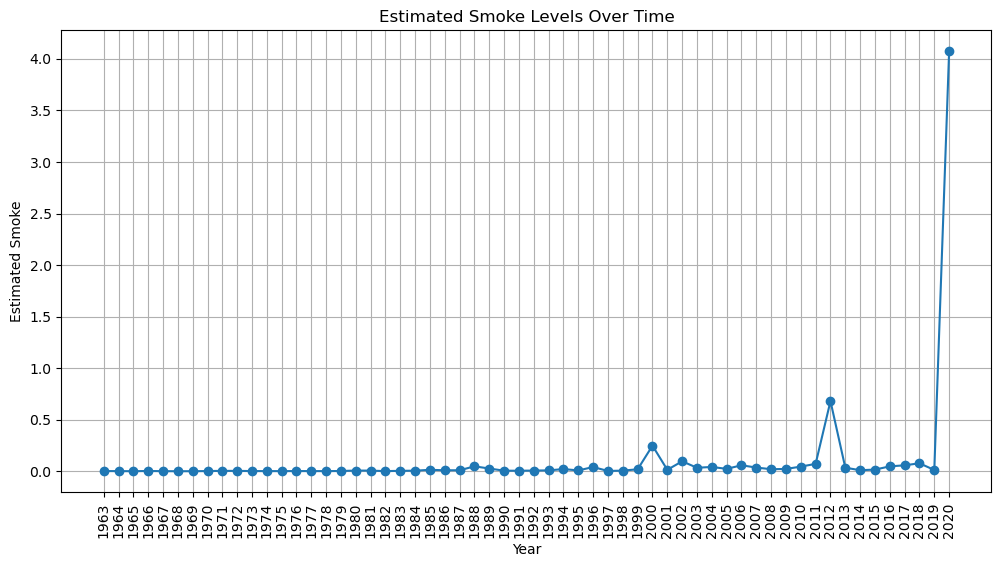

In [18]:
def plot_pm25_over_time(yearly_aqi):
    years = []
    pm25_averages = []

    for year, data in yearly_aqi.items():
        if data['estimated'] is not None:
            years.append(year)
            pm25_averages.append(data['estimated'])

    plt.figure(figsize=(12, 6))
    plt.plot(years, pm25_averages, marker='o')
    plt.title('Estimated Smoke Levels Over Time')
    plt.xlabel('Year')
    plt.ylabel('Estimated Smoke')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

plot_pm25_over_time(yearly_aqi)

## Using Mortality Data
Loading in mortality data sourced from the Colorado Department of Public Health and [this](https://www.sciencedirect.com/science/article/pii/S0013935123003833) published paper. This mortality data focuses on the Front Range of Colorado, which Larimer is located in. 

In [20]:
# mortality data
data = """
Year,All Causes,CVD,Respiratory,Despair,COVID-19
All,287087,73411 (25.6),28768 (10.0),33947 (11.8),
2010,22295,5752 (25.8),2380 (10.7),2644 (11.9),
2011,23213,5882 (25.3),2435 (10.5),2829 (12.2),
2012,23545,5981 (25.4),2377 (10.1),2974 (12.6),
2013,24256,6206 (25.6),2590 (10.7),2834 (11.7),
2014,25022,6669 (26.7),2693 (10.8),3008 (12.0),
2015,25823,6758 (26.2),2804 (10.9),3062 (11.9),
2016,26824,6932 (25.8),2700 (10.1),3191 (11.9),
2017,27154,6830 (25.2),2783 (10.2),3195 (11.8),
2018,27574,7205 (26.1),2785 (10.1),3219 (11.7),
2019,27756,7362 (26.5),2585 (9.3),3234 (11.7),
2020,33625,7834 (23.3),2636 (7.8),3757 (11.2),3220 (1.1)
"""

death_data = pd.read_csv(StringIO(data))

# filter values
for column in death_data.columns[1:]:
    death_data[column] = death_data[column].astype(str).str.replace(r"\s*\(.*?\)\s*", "", regex=True)
    death_data[column] = pd.to_numeric(death_data[column], errors='coerce')

# Display mortality dataframe
print(death_data)

    Year  All Causes    CVD  Respiratory  Despair  COVID-19
0    All      287087  73411        28768    33947       NaN
1   2010       22295   5752         2380     2644       NaN
2   2011       23213   5882         2435     2829       NaN
3   2012       23545   5981         2377     2974       NaN
4   2013       24256   6206         2590     2834       NaN
5   2014       25022   6669         2693     3008       NaN
6   2015       25823   6758         2804     3062       NaN
7   2016       26824   6932         2700     3191       NaN
8   2017       27154   6830         2783     3195       NaN
9   2018       27574   7205         2785     3219       NaN
10  2019       27756   7362         2585     3234       NaN
11  2020       33625   7834         2636     3757    3220.0


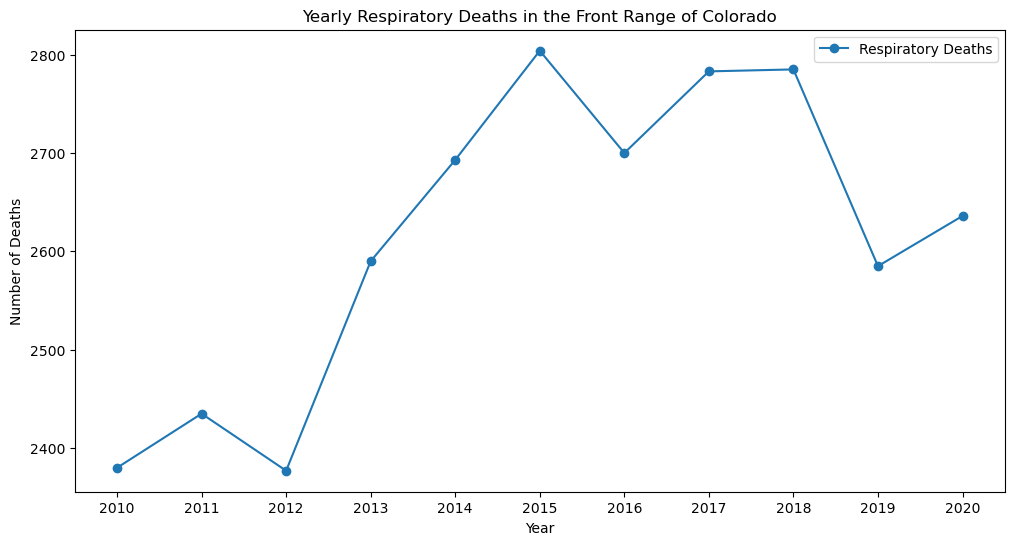

In [5]:
# filter out the row where 'Year' is 'All'
df_filtered = death_data[death_data['Year'] != 'All']

plt.figure(figsize=(12, 6))

plt.plot(df_filtered['Year'], df_filtered['Respiratory'], label='Respiratory Deaths', marker='o')

# Adding titles and labels
plt.title('Yearly Respiratory Deaths in the Front Range of Colorado')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')

plt.legend()

plt.show()

## Estimating Future Smoke Severity
I am using an ARIMA (AutoRegressive Integrated Moving Average) model to forecast smoke severity over a 10 year period. ARIMA is a statistical method often used in timer series forcasting, it combines autoregressive and moving average models. It also incorperates differencing to make the time series stationary. I chose an ARIMA 5,1,1 meaning: Autoregressive with order 5 means the current value is based upon the last 5. Integrated order 1 means that the data needs to be differenced once to achieve stationarity. And finally Moving average of degree 1 meaning I am smoothing out the noise in the data. 

In [57]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore') # ignore warning

# prep the data
data = {year: details['estimated'] for year, details in yearly_aqi.items()}
ts = pd.Series(data).sort_index()

train = ts.loc[:'2019']
test = ts.loc['2020':]

# ARIMA Model 5,1,1

model = ARIMA(train, order=(5,1,1))
model_fit = model.fit()

# Forecast
forecast_years = np.arange(2020, 2031)
forecast = model_fit.forecast(steps=len(forecast_years))

# Display Forecast
for year, value in zip(forecast_years, forecast):
    print(f'Year: {year}, Forecasted Smoke Severity: {value}')
    


Year: 2020, Forecasted Smoke Severity: 0.08988618280358861
Year: 2021, Forecasted Smoke Severity: 0.08510432582947142
Year: 2022, Forecasted Smoke Severity: 0.08528869624972599
Year: 2023, Forecasted Smoke Severity: 0.07838731949252875
Year: 2024, Forecasted Smoke Severity: 0.07817515056400942
Year: 2025, Forecasted Smoke Severity: 0.07397596347710418
Year: 2026, Forecasted Smoke Severity: 0.07555760355739258
Year: 2027, Forecasted Smoke Severity: 0.07636928381263483
Year: 2028, Forecasted Smoke Severity: 0.07724082571313329
Year: 2029, Forecasted Smoke Severity: 0.07721037186586137
Year: 2030, Forecasted Smoke Severity: 0.07718324060755913


## Making the mortality estimation
We combine time series forcasting and linear regression to predict the future respitory mortalities in the front range of Colorado. 
The first step (used above) uses the ARIMA model 5,1,1 to forcast future smoke severity, while the second step involves integrating these values with historical respitory mortality. A linear regression model was used by training on historical mortality and smoke estimation data, and then predicts mortality rates from 2020 - 2030. 

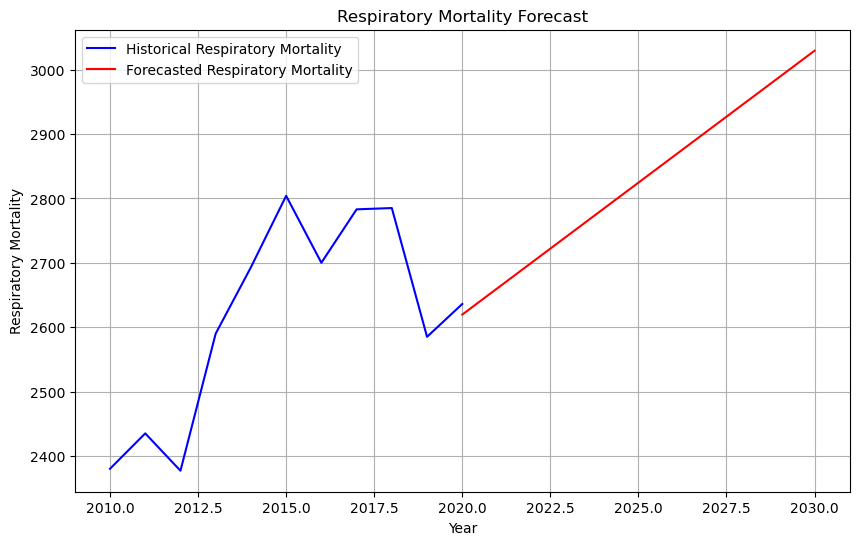

In [74]:
from sklearn.linear_model import LinearRegression

# time series data for ARIMA
ts = pd.Series({int(year): details['estimated'] for year, details in yearly_aqi.items()}).sort_index()

# Fit ARIMA model
model_arima = ARIMA(ts.loc[2010:], order=(5,1,1))
model_fit_arima = model_arima.fit()
forecast_years = np.arange(2021, 2031)
forecast_aqi = model_fit_arima.forecast(steps=len(forecast_years))

# Combine smoke estimate with forecasted data
historical_aqi_df = pd.DataFrame({'Year': ts.loc[2010:].index, 'Estimated_AQI': ts.loc[2010:]})
forecast_aqi_df = pd.DataFrame({'Year': forecast_years, 'Estimated_AQI': forecast_aqi})
combined_aqi_df = pd.concat([historical_aqi_df, forecast_aqi_df])

# prep mortality df
mortality_df = pd.DataFrame(df_filtered, columns=['Year', 'All_Causes', 'CVD', 'Respiratory', 'Despair', 'COVID-19'])
mortality_df['Year'] = mortality_df['Year'].astype(int)

# merge mortality data with combined smoke data
combined_df = pd.merge(mortality_df, combined_aqi_df, on='Year', how='outer')

train_df = combined_df.dropna(subset=['Respiratory'])
predict_df = combined_df

# fit Linear Regression model using training data
model_lr = LinearRegression()
model_lr.fit(train_df[['Year', 'Estimated_AQI']], train_df['Respiratory'])

# predict respiratory mortality 
predicted_mortality = model_lr.predict(predict_df[['Year', 'Estimated_AQI']])

# plot
plt.figure(figsize=(10, 6))
plt.plot(mortality_df['Year'], mortality_df['Respiratory'], label='Historical Respiratory Mortality', color='blue')
plt.plot(predict_df['Year'][10:], predicted_mortality[10:], label='Forecasted Respiratory Mortality', color='red')
plt.title('Respiratory Mortality Forecast')
plt.xlabel('Year')
plt.ylabel('Respiratory Mortality')
plt.legend()
plt.grid(True)
plt.show()
